 
 ## Limitações da Análise e Contexto da Amostra

É fundamental, em qualquer projeto de análise de dados, reconhecer as características e possíveis limitações do conjunto de dados utilizado. Esta análise, embora rica em insights, baseia-se em uma amostra com uma característica predominante.

### Concentração de Respondentes do Período Noturno

Observou-se que a grande maioria dos participantes que responderam ao formulário são estudantes do **período noturno**. Este desbalanceamento na amostra é um ponto crucial a ser considerado, pois implica que as conclusões gerais são fortemente influenciadas pela realidade e pelos hábitos deste grupo específico.

### Implicações para a Comparação entre Turnos

Devido a essa concentração, não foi possível realizar uma análise comparativa robusta para determinar qual dos turnos (manhã, tarde ou noite) é mais suscetível a fatores que levam às faltas. Uma comparação direta seria estatisticamente desbalanceada, pois a baixa quantidade de respostas dos períodos matutino e vespertino não constitui uma base suficiente para tirar conclusões generalizadas sobre esses grupos.

Portanto, os insights aqui apresentados, especialmente aqueles que tratam de médias gerais, devem ser interpretados como um reflexo fiel do perfil dos respondentes — **majoritariamente estudantes do noturno** — e não como uma representação equitativa de toda a população universitária em seus diferentes turnos.

In [215]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização para os gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12


In [216]:
# --- 1. Carregamento  ---
# Carrega o arquivo CSV para um DataFrame do pandas
df = pd.read_csv('pesquisa.csv')
df2 = pd.read_csv('pesquisa.csv')    

## Alterando os nomes das colunas para melhor interpretação e analise

In [217]:
df2.rename(columns={
    "Qual é o seu gênero?": "Gênero",
    "A temperatura impacta na minha decisão de faltar às aulas.\n Exemplo : está frio": "Frio",
    "Caso sua resposta para a pergunta acima for acima de 1, responda: A partir de qual temperatura você começa a considerar faltar às aulas?": "Temperatura Considerada",
    "Os dias chuvosos impactam na minha escolha de faltar às aulas.": "Chuva",
    "A distância entre a minha casa (ou local de saída) e a universidade influencia minha decisão de faltar às aulas.": "Distância",
    "Caso a sua resposta para a pergunta acima for maior que 1, indique qual a distância (em tempo médio gasto de viagem) entre o local de saída até a universidade.": "Tempo Gasto",
    "Qual é o seu turno atual de aulas? \nExemplo: Caso for manhã e tarde, marque as 2 opções.": "Selecionar Turno",
    "O turno das minhas aulas impacta minha frequência .": "Impacto do Turno",
    "A falta de interesse no conteúdo impacta na decisão de faltar aulas.": "interesse",
    "O cansaço gerado pela minha rotina (como trabalho, atividades domésticas, cuidados com familiares, etc.) impacta na decisão de faltar às aulas.": "Cansaço",
    "O ambiente da sala de aula (relacionamento com colegas, comportamento da turma, clima social) impacta a minha decisão o de faltar às aulas.": "Ambiente",
    "Os meus compromissos pessoais (como consultas médicas, eventos familiares, viagens, entre outros) impactam na decisão de faltar às aulas.": "Compromissos",
}, inplace=True)
df2

,Carimbo de data/hora,Gênero,Frio,Temperatura Considerada,Chuva,Distância,Tempo Gasto,Selecionar Turno,Impacto do Turno,interesse,Cansaço,Ambiente,Compromissos
0,2025/06/17 8:00:33 PM GMT-3,Masculino,5,Abaixo de 10 °C,5,5,Maior que 1 hora e 30 minutos,Noite,5,5,5,5,5
1,2025/06/17 8:00:39 PM GMT-3,Masculino,5,Abaixo de 15 °C,5,5,Menor que 10 minutos,Noite,5,5,5,5,5
2,2025/06/17 8:00:57 PM GMT-3,Masculino,2,Abaixo de 5 °C,4,0,Menor que 1 hora e 30 minutos,Noite,0,0,4,5,2
3,2025/06/17 8:01:17 PM GMT-3,Prefiro nao responder,0,Abaixo de 0 °C,0,0,Menor que 30 minutos,Manhã,0,4,1,0,2
4,2025/06/17 8:01:30 PM GMT-3,Masculino,3,Abaixo de 15 °C,4,0,Menor que 10 minutos,Noite,5,4,4,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2025/06/24 1:12:46 PM GMT-3,Feminino,3,Abaixo de 0 °C,4,0,Menor que 30 minutos,Manhã,4,2,5,2,5
101,2025/06/24 1:14:32 PM GMT-3,Feminino,5,Abaixo de 10 °C,5,2,Menor que 30 minutos,Manhã,1,1,1,1,3
102,2025/06/24 1:14:40 PM GMT-3,Feminino,3,Abaixo de 0 °C,5,5,Maior que 1 hora e 30 minutos,Noite,1,3,4,2,5
103,2025/06/24 1:16:11 PM GMT-3,Masculino,2,Abaixo de 0 °C,5,4,Menor que 1 hora e 30 minutos,Noite,2,0,4,2,5


## Filtragem para utilizar apenas indivíduos do sexo masculino e feminino

In [218]:
# Filtra o DataFrame para incluir apenas 'Masculino' e 'Feminino', descartando "Prefiro nao responder"
df_filtrado = df2[df2['Gênero'].isin(['Masculino', 'Feminino'])].copy()

listando colunas

In [219]:
colunas_fatores = [
    'Frio',
    'Chuva',
    'Distância',
    'Impacto do Turno',
    'interesse',
    'Cansaço',
    'Ambiente',    
    'Compromissos'
]

# Análise 1: Contagem de Respostas por Gênero 

In [220]:
print("\n--- Análise 1: Contagem de Respostas por Gênero ---")
contagem_genero = df_filtrado['Gênero'].value_counts()
print(contagem_genero)


--- Análise 1: Contagem de Respostas por Gênero ---
Gênero
Masculino    51
Feminino     51
Name: count, dtype: int64


## Análise 2: Média Geral de Impacto por Gênero 


--- Análise 2: Média Geral de Impacto nas Faltas por Gênero ---
Média Geral do Público Feminino: 2.65
Média Geral do Público Masculino: 2.39


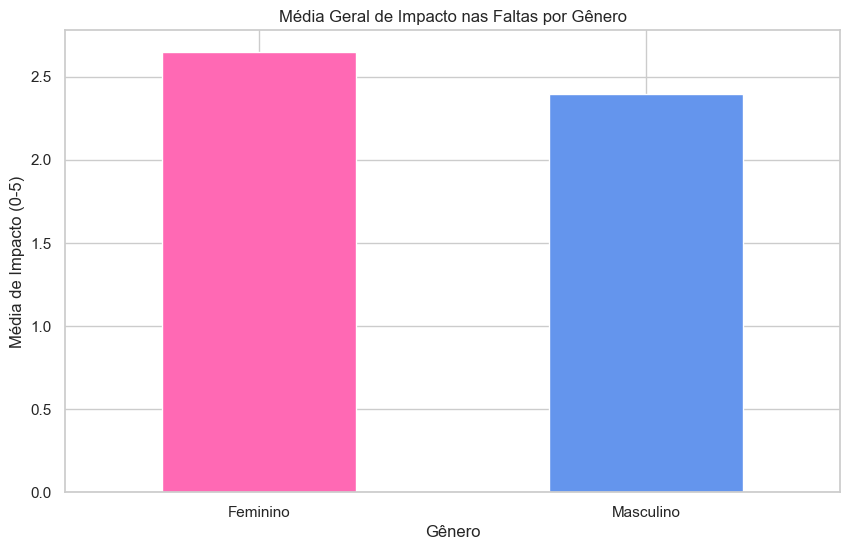

In [221]:
print("\n--- Análise 2: Média Geral de Impacto nas Faltas por Gênero ---")
# Calcula a média individual de cada participante
df_filtrado['Media_Individual'] = df_filtrado[colunas_fatores].mean(axis=1)

# Calcula a média geral para cada gênero
media_geral_genero = df_filtrado.groupby('Gênero')['Media_Individual'].mean()

print(f"Média Geral do Público Feminino: {media_geral_genero['Feminino']:.2f}")
print(f"Média Geral do Público Masculino: {media_geral_genero['Masculino']:.2f}")

# Visualização da Média Geral por Gênero
media_geral_genero.plot(kind='bar', color=['#FF69B4', '#6495ED'])
plt.title('Média Geral de Impacto nas Faltas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média de Impacto (0-5)')
plt.xticks(rotation=0)
plt.show()

# Análise 3: Análise Detalhada Fator a Fator 


--- Análise 3: Detalhamento da Média de Cada Fator por Gênero ---
Tabela de Médias por Fator e Gênero:
Gênero              Feminino  Masculino
Temperatura             2.80       2.37
Chuva                   3.49       2.82
Distância               2.41       1.71
Turno                   1.53       1.80
Falta de Interesse      1.98       2.51
Cansaço da Rotina       3.82       3.12
Ambiente de Aula        1.78       1.55
Compromissos            3.35       3.27


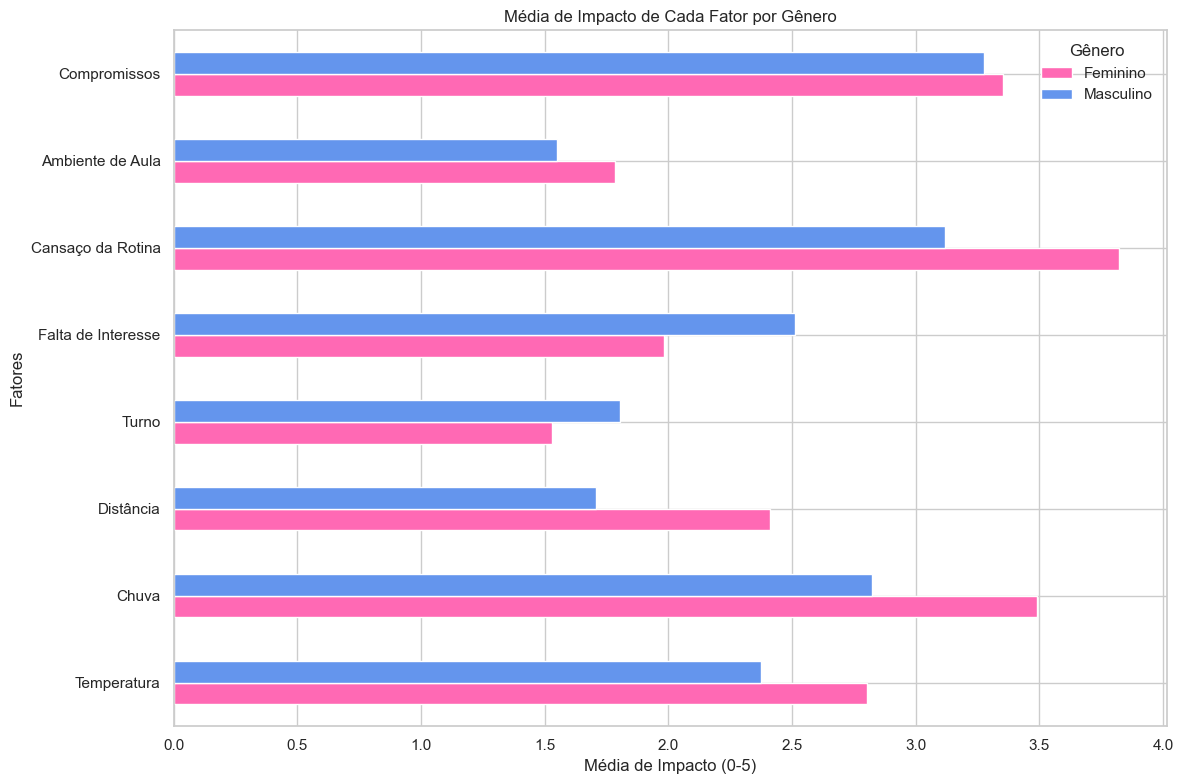

In [222]:
print("\n--- Análise 3: Detalhamento da Média de Cada Fator por Gênero ---")

# Calcula a média para cada fator, agrupando por gênero
media_detalhada = df_filtrado.groupby('Gênero')[colunas_fatores].mean().T # .T transpõe para facilitar a plotagem

# Renomeia as colunas para o gráfico
media_detalhada.index = [
    'Temperatura', 'Chuva', 'Distância', 'Turno',
    'Falta de Interesse', 'Cansaço da Rotina', 'Ambiente de Aula', 'Compromissos'
]

print("Tabela de Médias por Fator e Gênero:")
print(media_detalhada.round(2))

# Visualização da Análise Detalhada
media_detalhada.plot(kind='barh', figsize=(12, 8), color={'Feminino': '#FF69B4', 'Masculino': '#6495ED'})
plt.title('Média de Impacto de Cada Fator por Gênero')
plt.xlabel('Média de Impacto (0-5)')
plt.ylabel('Fatores')
plt.legend(title='Gênero')
plt.tight_layout() # Ajusta o layout para não cortar os rótulos
plt.show()


# Análise 4: Fator com Maior Média Geral 

In [223]:
print("\n--- Análise 4: Fator de Maior Impacto Geral ---")
# Calcula a média geral de cada fator
media_geral_fatores = df_filtrado[colunas_fatores].mean().sort_values(ascending=False)
fator_principal = media_geral_fatores.index[0]
media_fator_principal = media_geral_fatores.iloc[0]

print(f"O fator com a maior média de impacto geral é:\n'{fator_principal.strip()}'")
print(f"Com uma média geral de: {media_fator_principal:.2f}")

# Apresenta a média desse fator principal dividida por gênero
media_principal_genero = df_filtrado.groupby('Gênero')[fator_principal].mean()
print("\nMédia deste fator por gênero:")
print(f"- Feminino: {media_principal_genero['Feminino']:.2f}")
print(f"- Masculino: {media_principal_genero['Masculino']:.2f}")


--- Análise 4: Fator de Maior Impacto Geral ---
O fator com a maior média de impacto geral é:
'Cansaço'
Com uma média geral de: 3.47

Média deste fator por gênero:
- Feminino: 3.82
- Masculino: 3.12


## Análise 5: Principais motivos relatados para faltar às aulas

Principais motivos para faltar (média de impacto):
Cansaço             3.476190
Compromissos        3.333333
Chuva               3.161905
Frio                2.609524
interesse           2.314286
Distância           2.047619
Ambiente            1.666667
Impacto do Turno    1.619048
dtype: float64


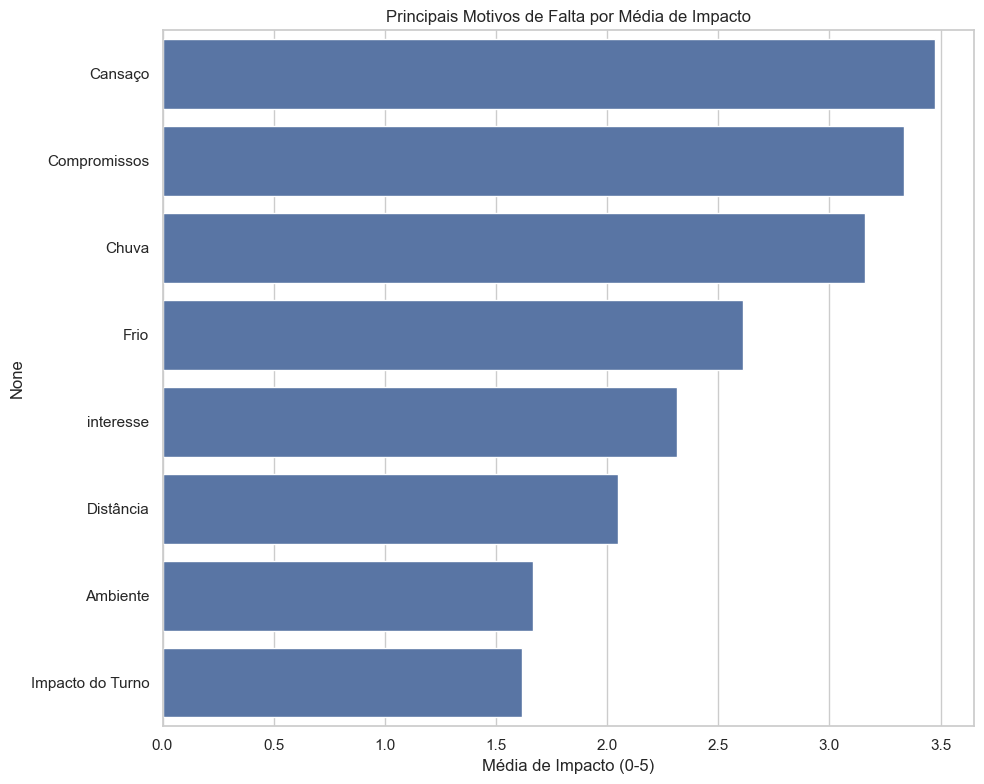

In [224]:
# Análise: Principais motivos relatados para faltar

average_impact = df2[colunas_fatores].mean().sort_values(ascending=False)

print("Principais motivos para faltar (média de impacto):")
print(average_impact)

plt.figure(figsize=(10, 8))
sns.barplot(x=average_impact.values, y=average_impact.index)
plt.title("Principais Motivos de Falta por Média de Impacto")
plt.xlabel("Média de Impacto (0-5)")
plt.tight_layout()
plt.show()

In [225]:
print("As perguntas mais significativas (com maior média de impacto) são:")
print(average_impact.head(3))

As perguntas mais significativas (com maior média de impacto) são:
Cansaço         3.476190
Compromissos    3.333333
Chuva           3.161905
dtype: float64


## Analisando qual faixa de temperatura é mais escolhida dentre os indivíduos que consideram o frio um fator determinante


--- Análise de Temperatura para Pessoas Fortemente Impactadas ---

Total de respondentes que consideram a temperatura um fator importante (nota 3, 4 ou 5): 56

Contagem das faixas de temperatura escolhidas por este grupo:
Temperatura Considerada
Abaixo de 10 °C    23
Abaixo de 5 °C     18
Abaixo de 15 °C     8
Abaixo de 0 °C      6
Name: count, dtype: int64


C:\Users\mulit\AppData\Local\Temp\ipykernel_13032\2353500671.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frequencia_temperatura.index, y=frequencia_temperatura.values, palette='coolwarm')


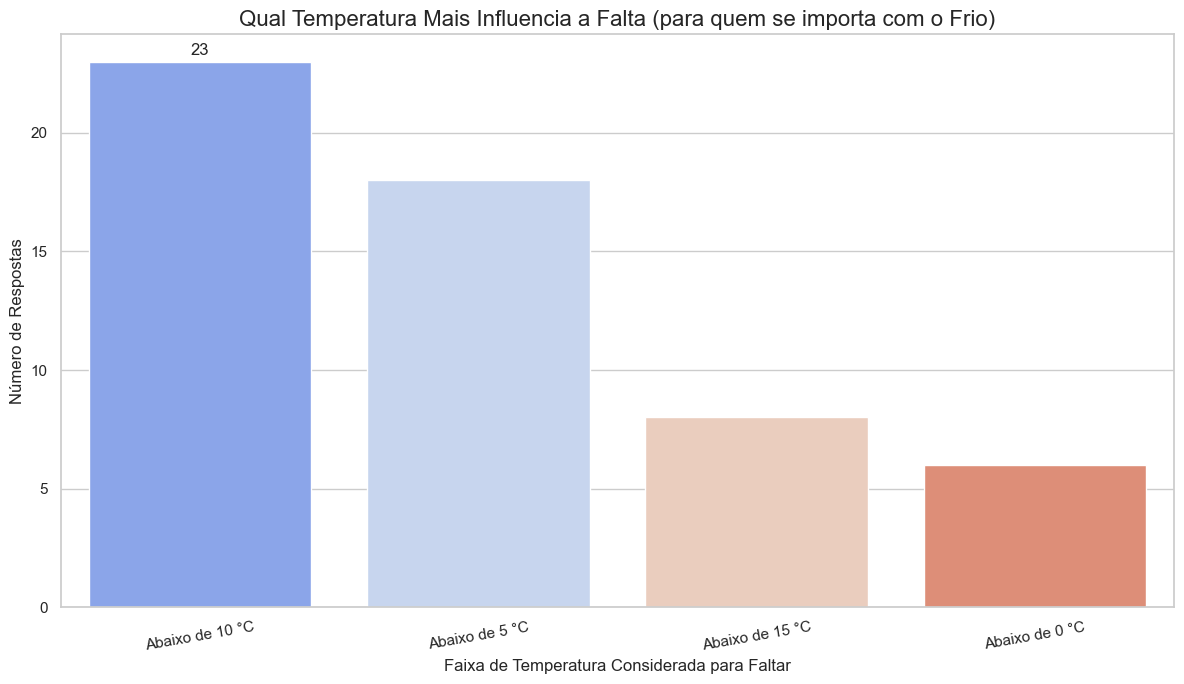


🔎 Conclusão da Análise:
Para as pessoas que são mais impactadas pela temperatura, a faixa de 'Abaixo de 10 °C' é a mais frequentemente citada como o ponto a partir do qual consideram faltar às aulas.


In [226]:
# Define os nomes das colunas de interesse para facilitar a leitura do código
coluna_impacto_temp = 'Frio'
coluna_faixa_temp = 'Temperatura Considerada'

# Filtra o DataFrame, selecionando apenas as linhas onde a resposta para o impacto da temperatura foi 3, 4 ou 5.
df_impacto_alto = df2[df2[coluna_impacto_temp].isin([3, 4, 5])].copy()

print("\n--- Análise de Temperatura para Pessoas Fortemente Impactadas ---")
print(f"\nTotal de respondentes que consideram a temperatura um fator importante (nota 3, 4 ou 5): {len(df_impacto_alto)}\n")

# Para este grupo filtrado, conta a frequência de cada resposta na pergunta sobre a faixa de temperatura
frequencia_temperatura = df_impacto_alto[coluna_faixa_temp].value_counts()

print("Contagem das faixas de temperatura escolhidas por este grupo:")
print(frequencia_temperatura)

# --- 3. Visualização dos Resultados ---

# Configura o estilo e o tamanho do gráfico
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

# Cria o gráfico de barras com uma paleta de cores
ax = sns.barplot(x=frequencia_temperatura.index, y=frequencia_temperatura.values, palette='coolwarm')

# Adiciona os valores exatos no topo de cada barra para maior clareza
ax.bar_label(ax.containers[0], fontsize=12, padding=3)

# Define os títulos e os rótulos do gráfico
plt.title('Qual Temperatura Mais Influencia a Falta (para quem se importa com o Frio)', fontsize=16)
plt.xlabel('Faixa de Temperatura Considerada para Faltar', fontsize=12)
plt.ylabel('Número de Respostas', fontsize=12)
plt.xticks(rotation=10) # Rotaciona levemente os rótulos do eixo X para não sobrepor
plt.tight_layout() # Ajusta o layout para garantir que tudo seja exibido corretamente

# Exibe o gráfico
plt.show()

# --- 4. Conclusão da Análise ---

# Pega o nome da faixa de temperatura mais votada (o primeiro item após value_counts)
if not frequencia_temperatura.empty:
    temperatura_mais_citada = frequencia_temperatura.index[0]
    print(f"\n🔎 Conclusão da Análise:")
    print(f"Para as pessoas que são mais impactadas pela temperatura, a faixa de '{temperatura_mais_citada}' é a mais frequentemente citada como o ponto a partir do qual consideram faltar às aulas.")
else:
    print("\nNão foram encontrados dados para a análise.")

## Analisando a correlação entre CHUVA VS DESLOCAMENTO


Analisando 84 respostas com tempo de deslocamento informado.

--- Média de Impacto da Chuva por Tempo de Deslocamento ---
Tempo Gasto
Menor que 10 minutos             3.39
Menor que 30 minutos             3.29
Menor que 1 hora                 3.09
Menor que 1 hora e 30 minutos    3.77
Maior que 1 hora e 30 minutos    4.12
Name: Chuva, dtype: float64


C:\Users\mulit\AppData\Local\Temp\ipykernel_13032\1387889515.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analise_chuva_distancia = df_analise.groupby(coluna_distancia)[coluna_chuva].mean().round(2)
C:\Users\mulit\AppData\Local\Temp\ipykernel_13032\1387889515.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=analise_chuva_distancia.index, y=analise_chuva_distancia.values, palette='Blues_d')


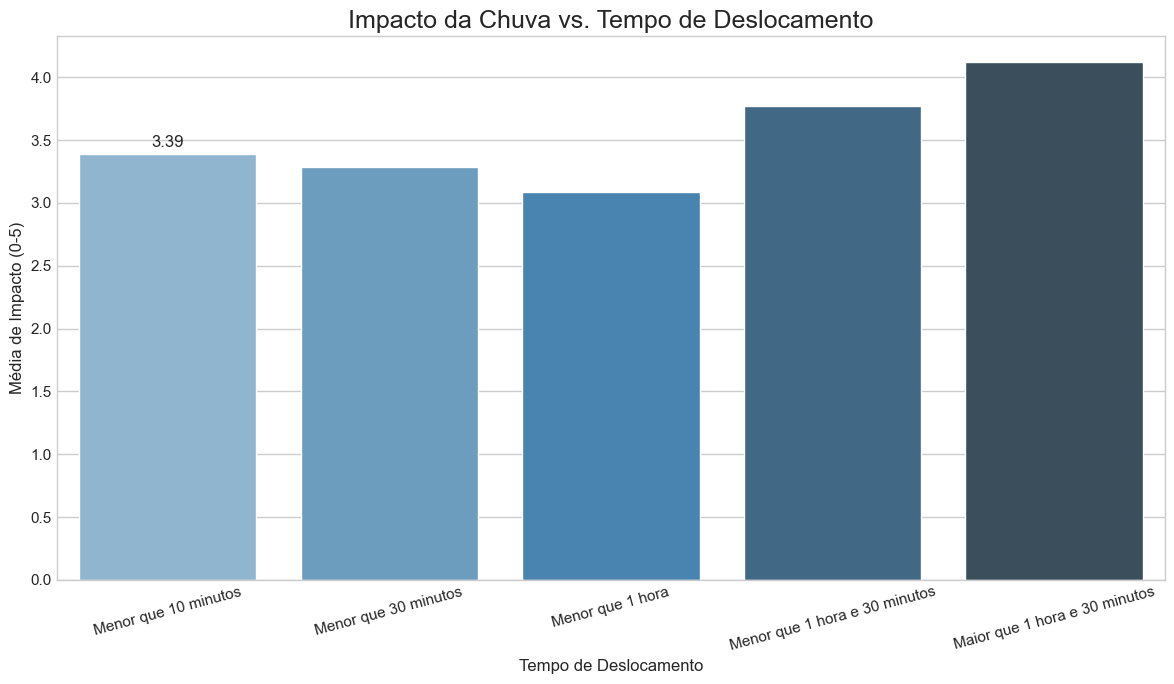

In [227]:
# Define os nomes das colunas de interesse para facilitar a leitura do código
coluna_distancia = 'Tempo Gasto'
coluna_chuva = 'Chuva'

# --- 2. Preparação dos Dados para Análise ---

# Remove as linhas onde a distância não foi informada, pois não são relevantes para esta análise
df_analise = df2.dropna(subset=[coluna_distancia]).copy()
print(f"Analisando {len(df_analise)} respostas com tempo de deslocamento informado.\n")

# Define a ordem lógica das categorias de tempo de viagem para o gráfico
ordem_distancia = [
    'Menor que 10 minutos',
    'Menor que 30 minutos',
    'Menor que 1 hora',
    'Menor que 1 hora e 30 minutos',
    'Maior que 1 hora e 30 minutos'
]
# Converte a coluna de distância para um tipo 'category' com a ordem definida
df_analise[coluna_distancia] = pd.Categorical(df_analise[coluna_distancia], categories=ordem_distancia, ordered=True)


# --- 3. Agrupamento e Cálculo da Média ---

# Agrupa os dados pelo tempo de deslocamento e calcula a média de impacto da chuva
analise_chuva_distancia = df_analise.groupby(coluna_distancia)[coluna_chuva].mean().round(2)

print("--- Média de Impacto da Chuva por Tempo de Deslocamento ---")
print(analise_chuva_distancia)


# --- 4. Visualização dos Resultados ---

# Configurações do gráfico
plt.figure(figsize=(12, 7))
plt.style.use('seaborn-v0_8-whitegrid')

# Cria o gráfico de barras
ax = sns.barplot(x=analise_chuva_distancia.index, y=analise_chuva_distancia.values, palette='Blues_d')

# Adiciona os valores no topo das barras para clareza
ax.bar_label(ax.containers[0], fontsize=12, padding=3)

# Define os títulos e os rótulos do gráfico
plt.title('Impacto da Chuva vs. Tempo de Deslocamento', fontsize=18)
plt.xlabel('Tempo de Deslocamento', fontsize=12)
plt.ylabel('Média de Impacto (0-5)', fontsize=12)
plt.xticks(rotation=15) # Rotaciona levemente os rótulos do eixo X
plt.tight_layout() # Ajusta o layout para garantir que tudo seja exibido corretamente

# Exibe o gráfico
plt.show()

## 📌 Conclusões da Análise

Com base nos dados coletados por meio do formulário, foi possível identificar os principais fatores que influenciam a decisão dos estudantes universitários de faltar às aulas.

- **Cansaço gerado pela rotina** foi o fator de maior impacto geral, com média de **3,47**. Esse impacto foi mais acentuado entre o público feminino (**3,82**) em comparação ao masculino (**3,12**).
- **Compromissos pessoais** e **dias de chuva** também se destacaram como fatores relevantes, com médias de **3,33** e **3,16**, respectivamente.
- Estudantes que informaram **tempos de deslocamento mais longos** (acima de 1h30) tendem a ser mais impactados por dias chuvosos, chegando a uma média de **4,12** nesse grupo.
- Em relação à **temperatura**, dos 56 participantes que atribuíram notas altas (3 a 5) para o impacto do frio, a faixa mais citada como decisiva para faltar foi **“abaixo de 10 °C”**.
- Fatores como **ambiente da sala**, **turno das aulas** e **falta de interesse** apresentaram menor impacto na média geral.

De modo geral, a análise revela que fatores externos (como clima e deslocamento) e pessoais (cansaço e compromissos) têm peso significativo na frequência acadêmica, sendo essenciais para considerar em políticas de apoio à permanência estudantil.
